# JSON examples and exercise
****
+ get familiar with packages for dealing with JSON
+ study examples with JSON strings and files 
+ work on exercise to be completed and submitted 
****
+ reference: http://pandas.pydata.org/pandas-docs/stable/io.html#io-json-reader
****

In [5]:
import pandas as pd

## imports for Python, Pandas

In [6]:
import json
from pandas.io.json import json_normalize

## JSON example, with string

+ demonstrates creation of normalized dataframes (tables) from nested json string
+ source: http://pandas.pydata.org/pandas-docs/stable/io.html#normalization

In [7]:
# define json string
data = [{'state': 'Florida', 
         'shortname': 'FL',
         'info': {'governor': 'Rick Scott'},
         'counties': [{'name': 'Dade', 'population': 12345},
                      {'name': 'Broward', 'population': 40000},
                      {'name': 'Palm Beach', 'population': 60000}]},
        {'state': 'Ohio',
         'shortname': 'OH',
         'info': {'governor': 'John Kasich'},
         'counties': [{'name': 'Summit', 'population': 1234},
                      {'name': 'Cuyahoga', 'population': 1337}]}]

In [8]:
# use normalization to create tables from nested element
json_normalize(data, 'counties')

,name,population
0,Dade,12345
1,Broward,40000
2,Palm Beach,60000
3,Summit,1234
4,Cuyahoga,1337


In [9]:
# further populate tables created from nested element
json_normalize(data, 'counties', ['state', 'shortname', ['info', 'governor']])

,name,population,state,shortname,info.governor
0,Dade,12345,Florida,FL,Rick Scott
1,Broward,40000,Florida,FL,Rick Scott
2,Palm Beach,60000,Florida,FL,Rick Scott
3,Summit,1234,Ohio,OH,John Kasich
4,Cuyahoga,1337,Ohio,OH,John Kasich


****
## JSON example, with file

+ demonstrates reading in a json file as a string and as a table
+ uses small sample file containing data about projects funded by the World Bank 

In [10]:
# load json as string
json.load((open('data/world_bank_projects_less.json')))

[{'_id': {'$oid': '52b213b38594d8a2be17c780'},
  'approvalfy': 1999,
  'board_approval_month': 'November',
  'boardapprovaldate': '2013-11-12T00:00:00Z',
  'borrower': 'FEDERAL DEMOCRATIC REPUBLIC OF ETHIOPIA',
  'closingdate': '2018-07-07T00:00:00Z',
  'country_namecode': 'Federal Democratic Republic of Ethiopia!$!ET',
  'countrycode': 'ET',
  'countryname': 'Federal Democratic Republic of Ethiopia',
  'countryshortname': 'Ethiopia',
  'docty': 'Project Information Document,Indigenous Peoples Plan,Project Information Document',
  'envassesmentcategorycode': 'C',
  'grantamt': 0,
  'ibrdcommamt': 0,
  'id': 'P129828',
  'idacommamt': 130000000,
  'impagency': 'MINISTRY OF EDUCATION',
  'lendinginstr': 'Investment Project Financing',
  'lendinginstrtype': 'IN',
  'lendprojectcost': 550000000,
  'majorsector_percent': [{'Name': 'Education', 'Percent': 46},
   {'Name': 'Education', 'Percent': 26},
   {'Name': 'Public Administration, Law, and Justice', 'Percent': 16},
   {'Name': 'Educatio

In [11]:
# load as Pandas dataframe
sample_json_df = pd.read_json('data/world_bank_projects_less.json')
sample_json_df

,_id,approvalfy,board_approval_month,boardapprovaldate,borrower,closingdate,country_namecode,countrycode,countryname,countryshortname,...,sectorcode,source,status,supplementprojectflg,theme1,theme_namecode,themecode,totalamt,totalcommamt,url
0,{'$oid': '52b213b38594d8a2be17c780'},1999,November,2013-11-12T00:00:00Z,FEDERAL DEMOCRATIC REPUBLIC OF ETHIOPIA,2018-07-07T00:00:00Z,Federal Democratic Republic of Ethiopia!$!ET,ET,Federal Democratic Republic of Ethiopia,Ethiopia,...,"ET,BS,ES,EP",IBRD,Active,N,"{'Name': 'Education for all', 'Percent': 100}","[{'name': 'Education for all', 'code': '65'}]",65,130000000,130000000,http://www.worldbank.org/projects/P129828/ethi...
1,{'$oid': '52b213b38594d8a2be17c781'},2015,November,2013-11-04T00:00:00Z,GOVERNMENT OF TUNISIA,NaN,Republic of Tunisia!$!TN,TN,Republic of Tunisia,Tunisia,...,"BZ,BS",IBRD,Active,N,"{'Name': 'Other economic management', 'Percent...","[{'name': 'Other economic management', 'code':...","54,24",0,4700000,http://www.worldbank.org/projects/P144674?lang=en


****
## JSON exercise

Using data in file 'data/world_bank_projects.json' and the techniques demonstrated above,
1. Find the 10 countries with most projects
2. Find the top 10 major project themes (using column 'mjtheme_namecode')
3. In 2. above you will notice that some entries have only the code and the name is missing. Create a dataframe with the missing names filled in.

In [12]:
#import packages
import pandas as pd
import json
from pandas.io.json import json_normalize
import matplotlib.pyplot as plt

# #1 Using JSON normalize

In [121]:
#load json file as string
file = json.load(open('data/world_bank_projects.json'))

In [177]:
#use normalize to create table
countries_top_ten = json_normalize(file)

#subset table to two columns, set index to 'countryname', sort by most projects and get top 10 countries by most projects
countries_top_ten = countries_top_ten[['countryname','project_name']].set_index('countryname').sort_index()
countries_top_ten = countries_top_ten.groupby(by=['countryname']).count().sort_values(by='project_name', ascending = False).head(10)
countries_top_ten = countries_top_ten.rename_axis('country')
countries_top_ten.columns =['number of projects'] 
countries_top_ten

,number of projects
country,
People's Republic of China,19
Republic of Indonesia,19
Socialist Republic of Vietnam,17
Republic of India,16
Republic of Yemen,13
People's Republic of Bangladesh,12
Nepal,12
Kingdom of Morocco,12
Republic of Mozambique,11


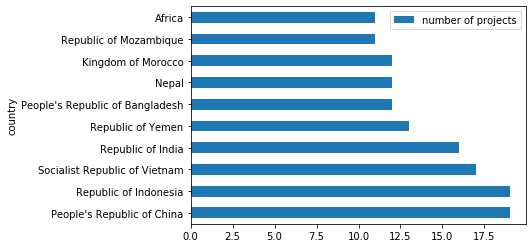

In [178]:
plot_top_ten = countries_top_ten.plot.barh()


# #2 counting by mjtheme_namecode

In [123]:
# load json file as string
file = json.load(open('data/world_bank_projects.json'))

In [124]:
#use normalize to create table
project_themes = json_normalize(file)

#subset table by 'mjtheme_namecode', count values of project themes, sort and get top 10
project_themes = project_themes[['mjtheme_namecode']].set_index('mjtheme_namecode')
project_themes = project_themes.index.value_counts().sort_values(ascending = False).head(10)
project_themes

[{'code': '11', 'name': 'Environment and natural resources management'}, {'code': '11', 'name': 'Environment and natural resources management'}]                                                                                12
[{'code': '8', 'name': 'Human development'}, {'code': '11', 'name': ''}]                                                                                                                                                        11
[{'code': '8', 'name': 'Human development'}, {'code': '8', 'name': 'Human development'}]                                                                                                                                         8
[{'code': '4', 'name': 'Financial and private sector development'}, {'code': '4', 'name': 'Financial and private sector development'}]                                                                                           6
[{'code': '2', 'name': 'Public sector governance'}, {'code': '2', 'name': 'Public sector gov

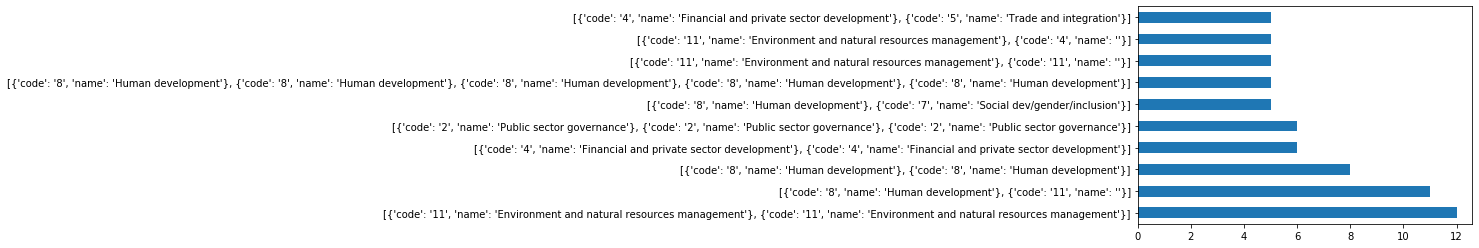

In [179]:
theme_top_ten = project_themes.plot.barh()

# #3

In [145]:
#load json file as string
file = json.load(open('data/world_bank_projects.json'))
import numpy as np
import matplotlib.pyplot as plt

In [146]:
#separate themes into single theme
theme_list = json_normalize(file)
theme_list = theme_list[['mjtheme_namecode']]
theme_list = theme_list['mjtheme_namecode'].tolist()
theme_df = pd.DataFrame(fill_names)

#create list of series 
theme_series = [theme_df[column] for column in theme_df]

#concatenate list of series into single dataframe, filter out null values
df = pd.concat(theme_series)
df = pd.DataFrame(df)
df.columns = ['theme']
df_themes = df[df.theme.notnull()]

In [147]:
#list comprehension of unique codes and codenames
key = []
key = [[item['code'], item['name']] for item in df_themes['theme'] if [[item['code'], item['name']] not in key]]

#list comprehension that filters out blank codenames
codename = [ele for ele in key if ele[1] != '']

#dictionary comprehension of code: codename pairs
code_dict = {code[0] : code[1] for code in codename}
code_dict

{'8': 'Human development',
 '1': 'Economic management',
 '5': 'Trade and integration',
 '7': 'Social dev/gender/inclusion',
 '6': 'Social protection and risk management',
 '2': 'Public sector governance',
 '11': 'Environment and natural resources management',
 '10': 'Rural development',
 '4': 'Financial and private sector development',
 '9': 'Urban development',
 '3': 'Rule of law'}

In [148]:
#load json file as string
file = json.load(open('data/world_bank_projects.json'))

In [149]:
#for loop over dataframe of themes that replaces any blank codenames
for item in df_themes.theme:
    item['name'] = code_dict[item['code']]

#split dataframe into code and name columns
df_theme = df_themes.theme.to_list()
df_theme = pd.DataFrame(df_theme)
df_theme.head()

,code,name
0,8,Human development
1,1,Economic management
2,5,Trade and integration
3,7,Social dev/gender/inclusion
4,5,Trade and integration


In [150]:
#value counts of each theme
df_theme = df_theme.name.value_counts()

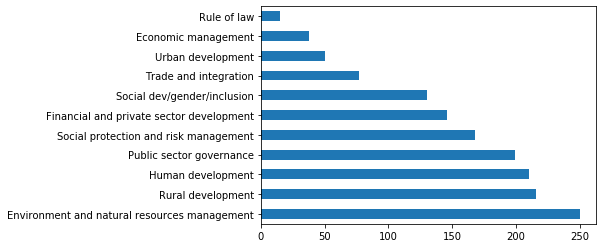

In [151]:
df_theme.plot(kind='barh')